In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#from mpl_toolkits.mplot3d import Axes3D  #### is this required
#import matplotlib.animation as animation
#from IPython.display import HTML


Quasiparticle Force
$$  \vec{F} = A \left( -\frac{1}{r_{12}^{3}} + \frac{d^{2}}{r_{12}^{5}} \right) \hat{r}_{12} \\
= A \left( -\frac{1}{r_{12}^{4}} + \frac{d^{2}}{r_{12}^{6}} \right) \vec{r}_{12}
$$

In [2]:
def force(r1,r2,d=0.1,fmag=1.0):  #inputs 1-D vectors length 2
    x1, y1 = r1
    x2, y2 = r2
    rsq = max([(x2 - x1)**2 + (y2 - y1)**2, 0.00001])
    f = fmag*(-1/(rsq**(2)) + (d**2)/(rsq**(3)))
    return np.array([f*(x1-x2), f*(y1-y2)])

### Parameters 

Notably the number of particles, a force scaling parameter, $f_{mag}$, an intraparticle distance scale, $d$, and a time step $dt$.

In [3]:
nparticles = 100   ##### Number of particles is proportional to mass
fmag = 2.0 ### Keep this the same number in the simulations
d = 0.50 ### keep this the same number in the simulations
dt = 0.01 # Time step
g = np.asarray([0,-3.5]) # gravity


The properties of the particles will be in two 2-D arays, one for position and one for velocity. The columns of the position array will be $[ x, y, z] $ and
$ [ v_{x}, v_{y}, v_{z}] $


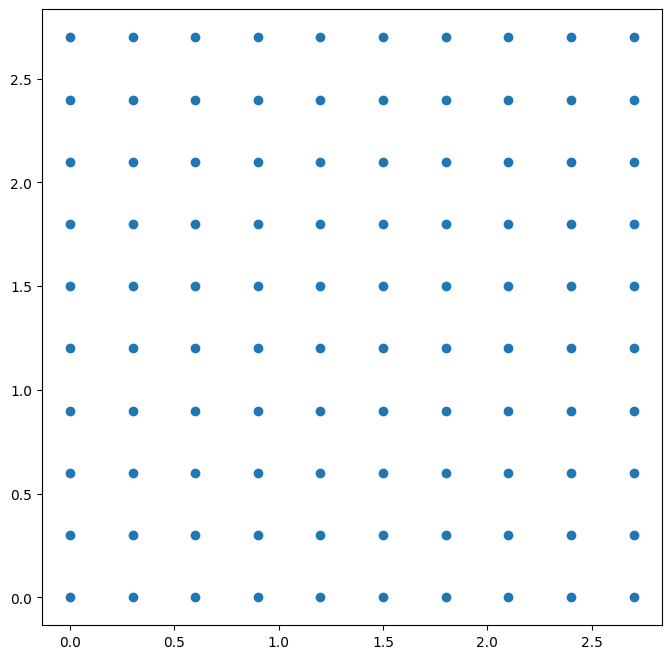

In [4]:
#Initial arrays
posArr = np.zeros(shape=(nparticles,2))
velArr = np.zeros(shape=(nparticles,2))

gScale = 0.60 ## Needed to prevent out of control collapse from unnatural grid initial conditions

xDim = int(np.ceil(np.sqrt(nparticles))) # size of box
yDim = int(np.ceil(np.sqrt(nparticles)))

obIdx = 0
for j in range(yDim):
    for i in range(xDim):
            if (obIdx < nparticles):
                posArr[obIdx,:] = [i*d*gScale, j*d*gScale]
                
            obIdx = obIdx + 1

xBox = (xDim-1)*d*gScale
yBox = (yDim-1)*d*gScale

### Small random velocities
#ranv = 0.001*np.random.normal(0, 0.5, nparticles)
#ranphi = np.random.uniform(0, 2*np.pi, nparticles)
#for i in range(nparticles):
#    velArr[i,0]=abs(ranv[i])*np.cos(ranphi[i])
#    velArr[i,1]=abs(ranv[i])*np.sin(ranphi[i])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(posArr[:,0],posArr[:,1])




Update routine
$$ \vec{v}_{t+1/2} = \vec{v}_{t} + \frac{(\Delta t)}{2} \vec{a}[\vec{r}_{t}] $$
$$ \vec{r}_{t+1} = \vec{r}_{t} + (\Delta t) \vec{v}_{t+1/2} $$
$$ \vec{v}_{t+1} = \vec{v}_{t+1/2} + \frac{(\Delta t)}{2} \vec{a}[\vec{r}_{t+1}] $$

In [ ]:
t = 0
tmax = 5
frict = 0.20 #Artificial friction coefficient for wall collisions

while t < tmax:
    for i in range(nparticles):
        f12 = np.array([0.0,0.0])
        for j in np.setdiff1d(range(nparticles), i):
            f12 = f12 + force(posArr[i,:], posArr[j,:], d, fmag)
        velArr[i,:] = velArr[i,:] + (f12 + g)*dt/2
        posArr[i,:] = posArr[i,:] + velArr[i,:]*dt
        f12 = np.array([0.0,0.0])
        for j in np.setdiff1d(range(nparticles), i):
            f12 = f12 + force(posArr[i,:], posArr[j,:], d, fmag)
        velArr[i,:] = velArr[i,:] + (f12 + g)*dt/2
        ### boundary conditions
        if (posArr[i,0] > xBox):
            posArr[i,0] = xBox
            velArr[i,0] = -(1-frict)*abs(velArr[i,0])
        elif (posArr[i,0] < 0):
            posArr[i,0] = 0
            velArr[i,0] = (1-frict)*abs(velArr[i,0])
        if (posArr[i,1] > yBox):
            posArr[i,1] = yBox
            velArr[i,1] = -(1-frict)*abs(velArr[i,1])
        elif (posArr[i,1] < 0):
            posArr[i,1] = 0
            velArr[i,1] = (1-frict)*abs(velArr[i,1])
    t = t + dt
            

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(posArr[:,0],posArr[:,1])
ax.quiver(posArr[:,0],posArr[:,1],velArr[:,0],velArr[:,1])